In [ ]:
# Import libraries
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Training data
X = np.array([[180, 0], [170, 0], [160, 1], [150, 1]])  # features: weight, texture
y = np.array(["Apple", "Apple", "Orange", "Orange"])   # labels

# Create KNN model
knn = KNeighborsClassifier(n_neighbors=3)

# Train model
knn.fit(X, y)

# Test data
test_point = np.array([[175, 0]])  # new fruit

# Prediction
prediction = knn.predict(test_point)
print("Predicted Fruit:", prediction[0])


Predicted Fruit: Apple


In [ ]:
# Import libraries
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

# Training data
X = np.array([[1000], [1200], [1500], [1800], [2000]])  # size in sq.ft
y = np.array([50, 60, 80, 90, 100])  # price in Lakhs

# Create KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=3)

# Train model
knn_reg.fit(X, y)

# Test data
test_point = np.array([[1600]])

# Prediction
prediction = knn_reg.predict(test_point)
print("Predicted House Price:", prediction[0])


Predicted House Price: 76.66666666666667


Age
0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64
Fasting Blood Sugar
0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: fbs, Length: 303, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


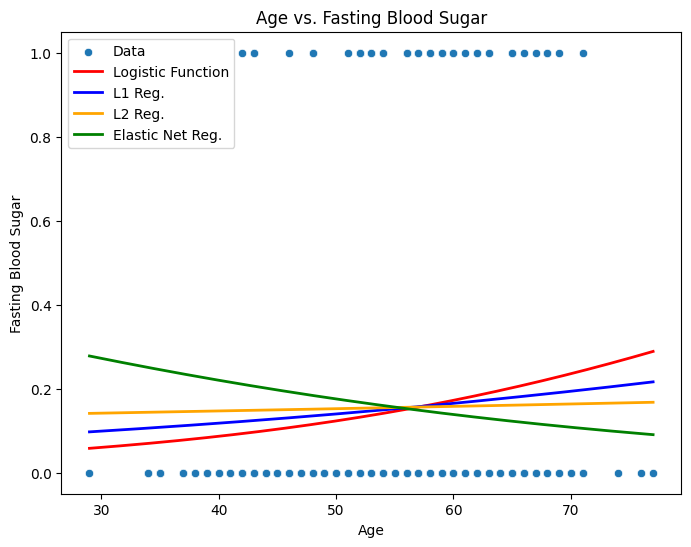

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
df = pd.read_csv("heart.csv")
print("Age")
print(df['age'])
print("Fasting Blood Sugar")
print(df['fbs'])
X = df['age'].values
x = X.reshape(-1,1)
y = df['fbs'].values
y = y.ravel()
log_reg = linear_model.LogisticRegression()
log_reg.fit(x,y)
log_reg1 = linear_model.LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
log_reg1.fit(x,y)
log_reg2 = linear_model.LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
log_reg2.fit(x,y)
log_reg3 = linear_model.LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42)
log_reg3.fit(x,y)
X_test = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_test)[:, 1]
y_prob1 = log_reg1.predict_proba(X_test)[:, 1]
y_prob2 = log_reg2.predict_proba(X_test)[:, 1]
y_prob3 = log_reg3.predict_proba(X_test)[:, 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x.flatten(), y=y, label='Data')
plt.plot(X_test, y_prob, color='red', linewidth=2, label='Logistic Function')
plt.plot(X_test, y_prob1, color='blue', linewidth=2, label='L1 Reg.')
plt.plot(X_test, y_prob2, color='orange', linewidth=2, label='L2 Reg.')
plt.plot(X_test, y_prob3, color='green', linewidth=2, label='Elastic Net Reg.')
plt.xlabel("Age")
plt.ylabel("Fasting Blood Sugar")
plt.title("Age vs. Fasting Blood Sugar")
plt.legend()
plt.show()


Age
0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64
Fasting Blood Sugar
0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: fbs, Length: 303, dtype: int64


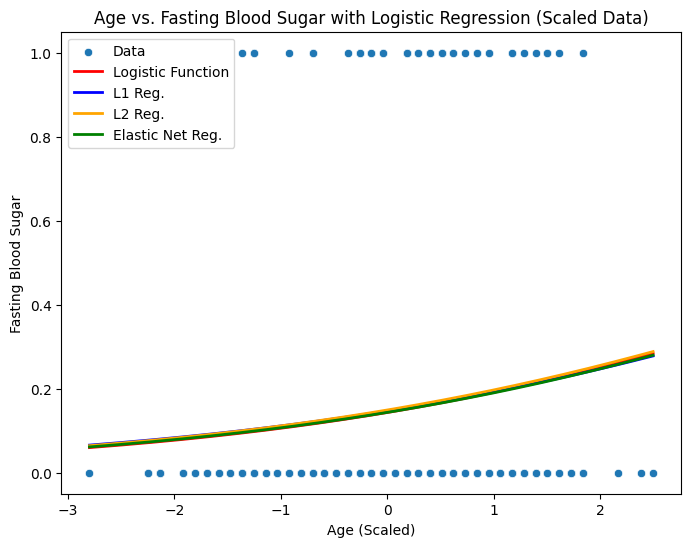

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv("heart.csv")

# Print age and fasting blood sugar columns
print("Age")
print(df['age'])
print("Fasting Blood Sugar")
print(df['fbs'])

# Prepare data for logistic regression
X = df['age'].values.reshape(-1,1)
y = df['fbs'].values.ravel()

# Scale the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Create and train logistic regression models with different penalties
log_reg = linear_model.LogisticRegression(max_iter=1000)
log_reg.fit(x_scaled,y)

log_reg1 = linear_model.LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000)
log_reg1.fit(x_scaled,y)

log_reg2 = linear_model.LogisticRegression(penalty='l2', solver='liblinear', random_state=42, max_iter=1000)
log_reg2.fit(x_scaled,y)

log_reg3 = linear_model.LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42, max_iter=1000)
log_reg3.fit(x_scaled,y)

# Generate points for the logistic function curves
X_test = np.linspace(x_scaled.min(), x_scaled.max(), 300).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_test)[:, 1]
y_prob1 = log_reg1.predict_proba(X_test)[:, 1]
y_prob2 = log_reg2.predict_proba(X_test)[:, 1]
y_prob3 = log_reg3.predict_proba(X_test)[:, 1]

# Plot the logistic functions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_scaled.flatten(), y=y, label='Data')
plt.plot(X_test, y_prob, color='red', linewidth=2, label='Logistic Function')
plt.plot(X_test, y_prob1, color='blue', linewidth=2, label='L1 Reg.')
plt.plot(X_test, y_prob2, color='orange', linewidth=2, label='L2 Reg.')
plt.plot(X_test, y_prob3, color='green', linewidth=2, label='Elastic Net Reg.')

plt.xlabel("Age (Scaled)")
plt.ylabel("Fasting Blood Sugar")
plt.title("Age vs. Fasting Blood Sugar with Logistic Regression (Scaled Data)")
plt.legend()
plt.show()